# Fungsi Aktivasi dalam Neural Network

Fungsi aktivasi itu penting dalam jaringan saraf tiruan (neural network) untuk memperkenalkan nonlinearitas ke dalam model.

## 1. ReLU (Rectified Linear Unit)

ReLU adalah fungsi aktivasi yang sangat sederhana namun efektif. ReLU mengubah semua nilai negatif jadi nol, sedangkan nilai positif tetap.

**Rumus matematis:**

$$
f(x) = \max(0, x)
$$

**Penjelasan:**
- Jika \( x > 0 \), maka \( f(x) = x \).
- Jika \( x \leq 0 \), maka \( f(x) = 0 \).

**Kelebihan:**
- Mengurangi masalah vanishing gradient.
- Perhitungan sangat cepat.

**Kekurangan:**
- Dapat mengalami masalah "dying ReLU" (neuron selalu output 0).

---

## 2. Sigmoid

Sigmoid adalah fungsi aktivasi berbentuk kurva S (sigmoid curve) yang memetakan input ke rentang antara 0 dan 1.

**Rumus matematis:**

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

**Penjelasan:**
- Cocok untuk masalah klasifikasi biner.
- Output berupa probabilitas.

**Kelebihan:**
- Memiliki interpretasi probabilistik.

**Kekurangan:**
- Rentan terhadap vanishing gradient.
- Output tidak terpusat di nol.

---

## 3. Tanh (Hyperbolic Tangent)

Tanh mirip dengan sigmoid tetapi memetakan input ke rentang antara -1 dan 1.

**Rumus matematis:**

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

atau bisa juga ditulis sebagai:

$$
\tanh(x) = 2\sigma(2x) - 1
$$

dengan \( \sigma(x) \) adalah fungsi sigmoid.

**Penjelasan:**
- Output terpusat di nol, sehingga mempercepat konvergensi saat training.

**Kelebihan:**
- Lebih baik dari sigmoid dalam banyak kasus karena outputnya simetris terhadap nol.

**Kekurangan:**
- Tetap bisa mengalami vanishing gradient pada input besar.

---


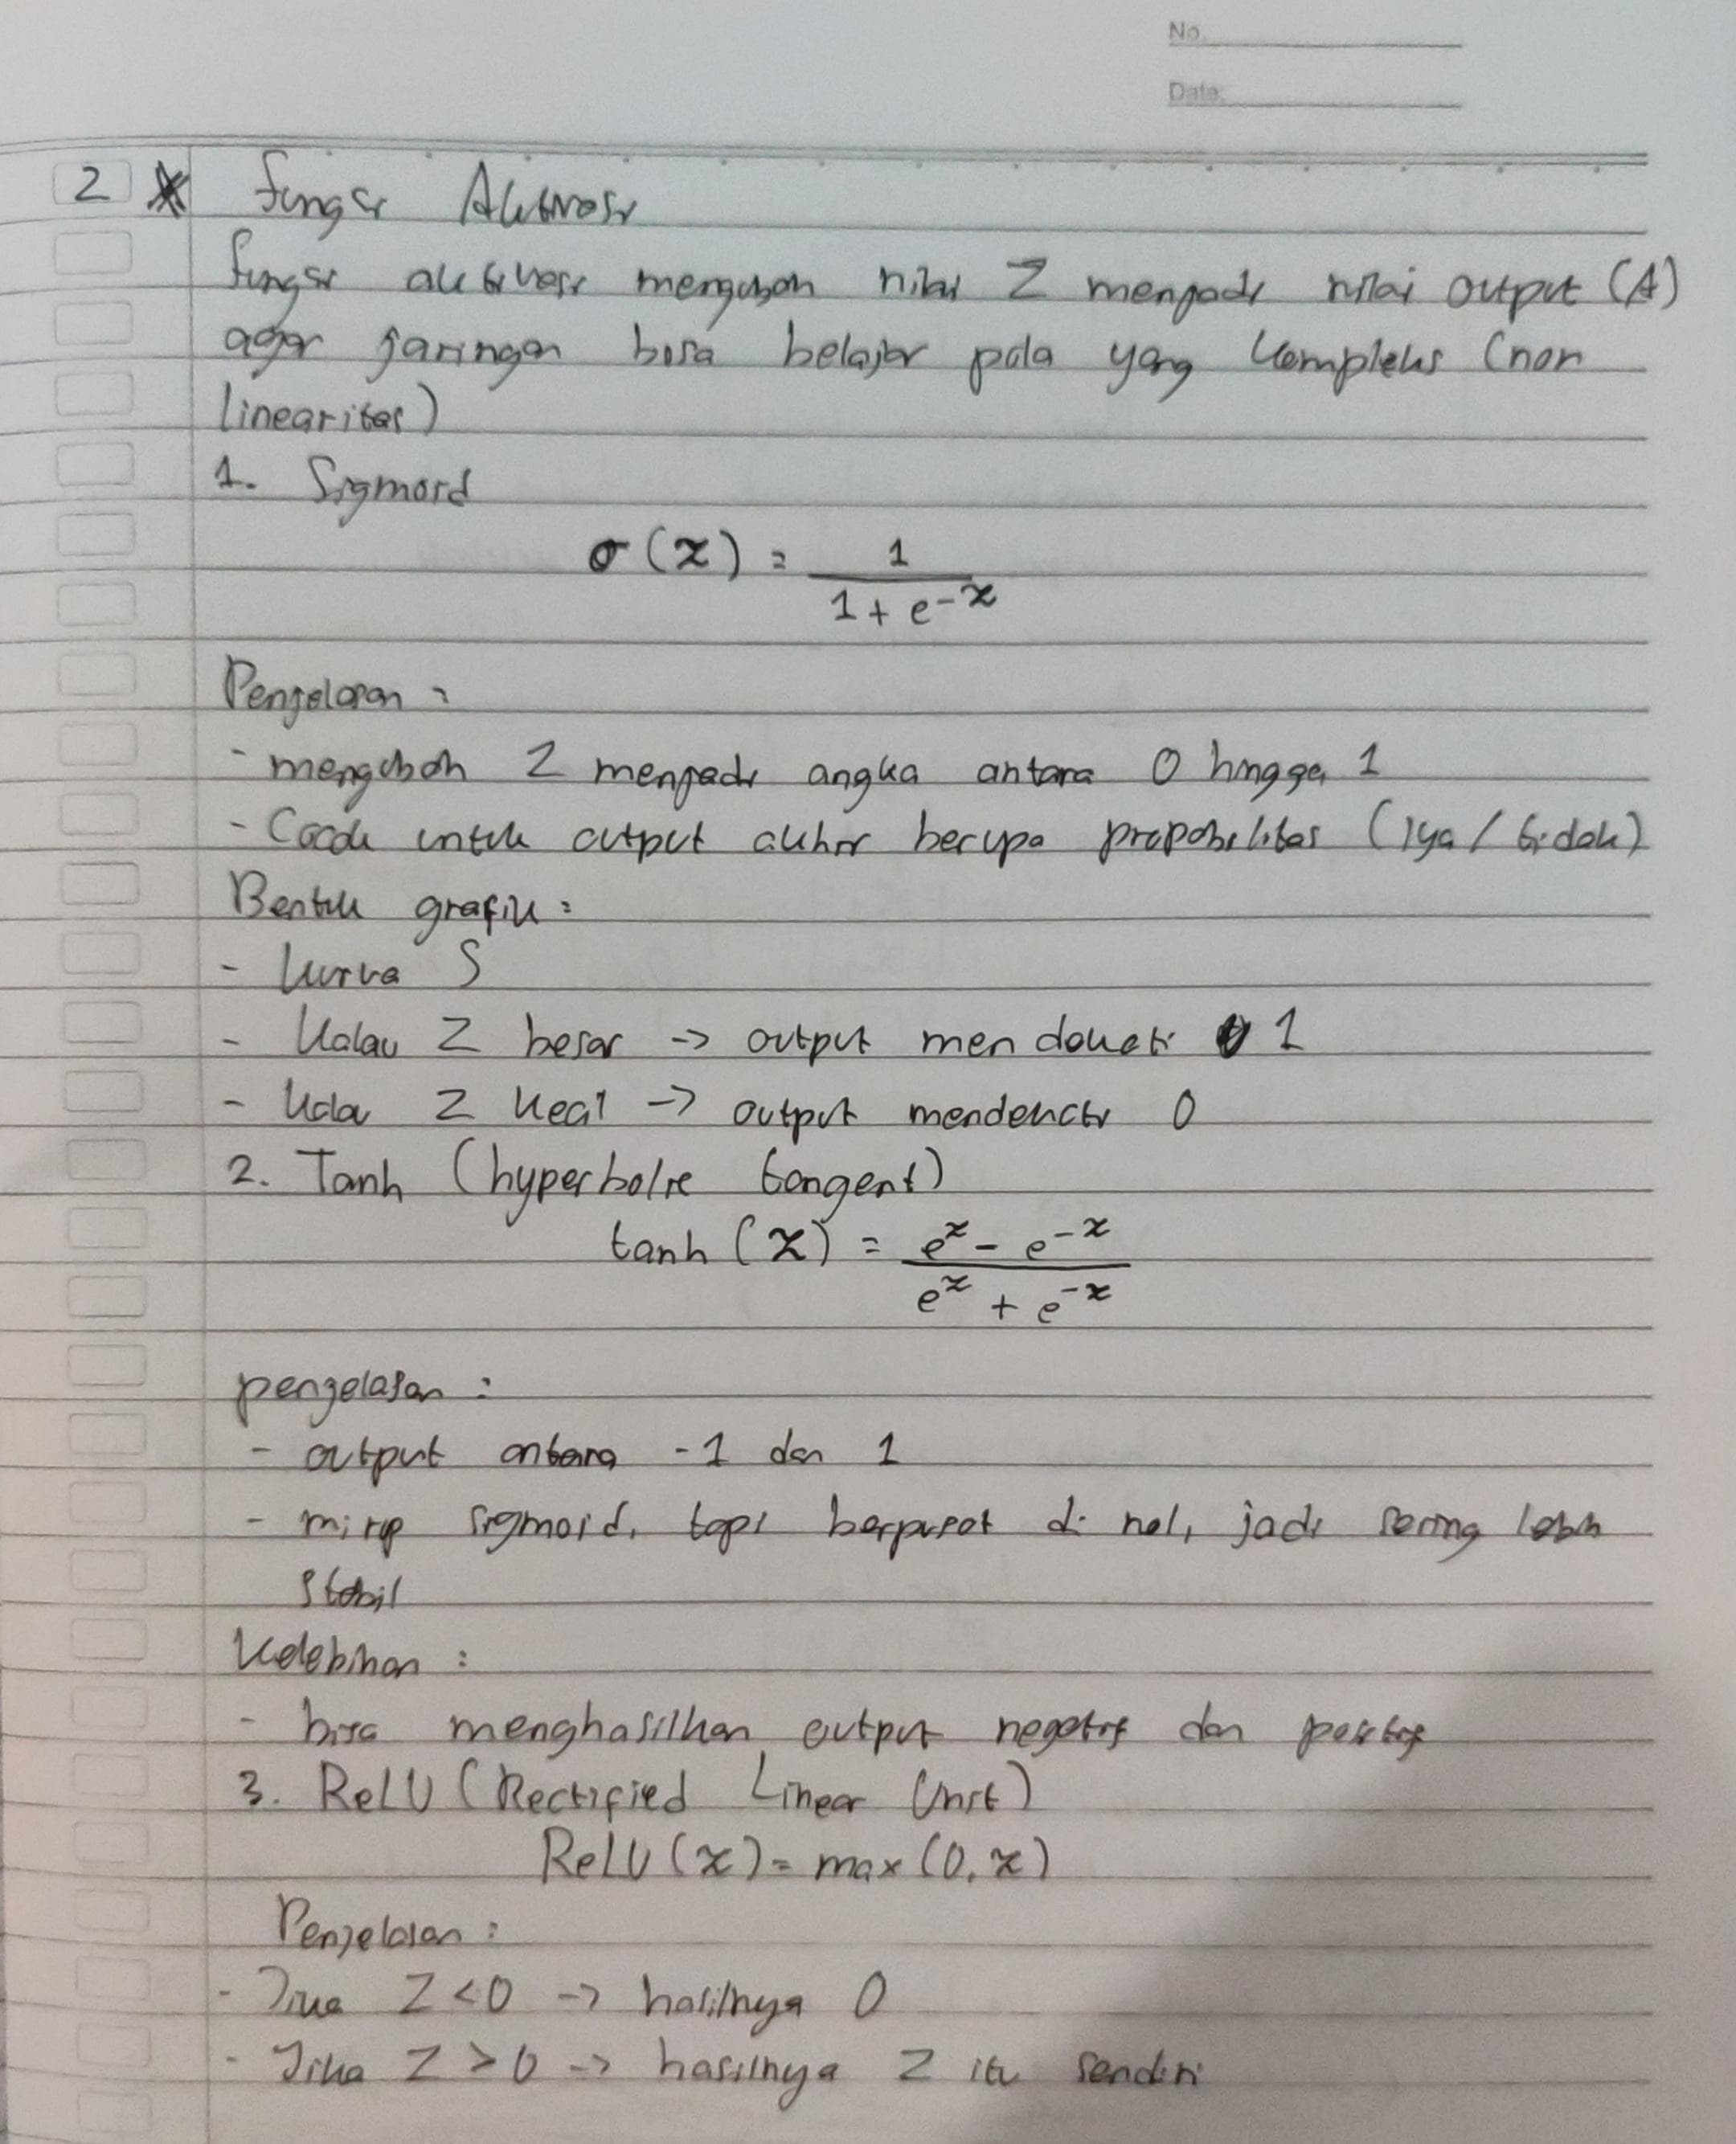

Training model Sigmoid...
Training model ReLU (no output activation)...
Training model ReLU (with output ReLU)...
Training model Tanh...
Training selesai!

Sample x_test: [-5. -4.  0.  4.  5.]
x_test setelah dinormalisasi: [-0.077 -0.06   0.009  0.077  0.094]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Prediksi (Sigmoid): [-0.24  0.01  1.92  6.05  7.51]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediksi (ReLU (no output activation)): [-9.94 -8.07  0.    8.01 10.  ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediksi (ReLU (with output ReLU)): [-1.   -1.   -0.01  8.   10.  ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediksi (Tanh): [-3.84 -2.36  3.43  9.24 10.73]


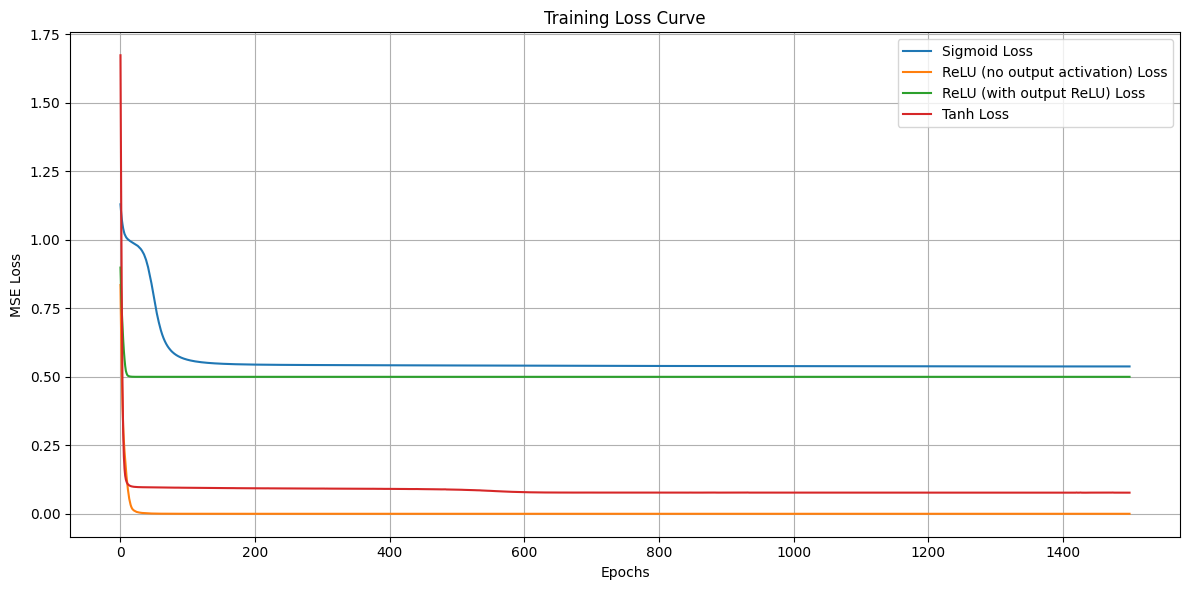

In [3]:
# AI GENERATED!

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 🔹 Normalisasi Data
x_train = np.array([i for i in range(-101, 101)], dtype=np.float32)
y_train = 2 * x_train

x_mean, x_std = np.mean(x_train), np.std(x_train)
y_mean, y_std = np.mean(y_train), np.std(y_train)

x_train = (x_train - x_mean) / x_std
y_train = (y_train - y_mean) / y_std

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# 🔹 Model dengan Aktivasi Sigmoid
model_sigmoid = keras.Sequential([
    layers.Dense(32, activation='sigmoid', input_shape=(1,)),
    layers.Dense(16, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')  #
])

# 🔹 Model dengan Aktivasi ReLU (tanpa aktivasi di output)
model_relu = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(1,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1) # Output layer tanpa aktivasi
])

# 🔹 Model dengan Aktivasi ReLU (dengan aktivasi di output)
model_relu_relu = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(1,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='relu')  # Output pakai ReLU juga
])

# 🔹 Model dengan Aktivasi Tanh
model_tanh = keras.Sequential([
    layers.Dense(32, activation='tanh', input_shape=(1,)),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation='tanh')
])

# 🔹 Kompilasi Model
models = {
    "Sigmoid": model_sigmoid,
    "ReLU (no output activation)": model_relu,
    "ReLU (with output ReLU)": model_relu_relu,
    "Tanh": model_tanh
}

histories = {}

for name, model in models.items():
    model.compile(optimizer='adam', loss='mse')
    print(f"Training model {name}...")
    histories[name] = model.fit(x_train, y_train, epochs=1500, verbose=0)

print("Training selesai!\n")

# 🔹 Data Uji
x_test = np.array([-5, -4, 0, 4, 5], dtype=np.float32)
x_test_norm = (x_test - x_mean) / x_std
x_test_norm = x_test_norm.reshape(-1, 1)

# 🔹 Print Sample Input dan Normalisasi
print("Sample x_test:", x_test)
print("x_test setelah dinormalisasi:", x_test_norm.squeeze().round(3))


# 🔹 Prediksi
for name, model in models.items():
    y_pred = model.predict(x_test_norm)
    y_pred_denorm = y_pred * y_std + y_mean
    print(f"Prediksi ({name}):", y_pred_denorm.squeeze().round(2))

# 🔹 Plot Training Loss
plt.figure(figsize=(12, 6))
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f"{name} Loss")

plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Forward Propagation

---

## Apa itu Forward Propagation?

**Forward Propagation** adalah proses di dalam jaringan saraf (neural network) untuk menghitung **prediksi output** berdasarkan:
- input awal (fitur),
- bobot (weights),
- bias,
- dan fungsi aktivasi.

Forward propagation dilakukan **dari input layer → hidden layer → output layer**.

---

## Langkah-langkah Forward Propagation

Pada umumnya, di setiap layer dilakukan dua tahap:

1. **Linear Transformation**:
   
   Hitung nilai linear:

   $$
   Z = W \cdot X + b
   $$

   dengan:
   - \( W \) = bobot (weights)
   - \( X \) = input
   - \( b \) = bias

2. **Non-linear Transformation**:
   
   Berikan hasil \( Z \) ke fungsi aktivasi untuk menghasilkan:

   $$
   A = \text{Activation}(Z)
   $$


# Perhitungan Forward Propagation (Contoh Kasus)

Diketahui:

Input:

$$
X =
\begin{bmatrix}
1.70 \\
65
\end{bmatrix}
$$

Bobot dan bias:

$$
W_1 =
\begin{bmatrix}
0.3 & 0.2 \\
0.4 & 0.6
\end{bmatrix}
,\quad
b_1 =
\begin{bmatrix}
0.1 \\
0.1
\end{bmatrix}
$$

$$
W_2 =
\begin{bmatrix}
0.5 & 0.9
\end{bmatrix}
,\quad
b_2 =
\begin{bmatrix}
0.2
\end{bmatrix}
$$

---

## Langkah 1: Hitung \( Z_1 \)

$$
Z_1 = W_1 \cdot X + b_1
$$

Hitung:

$$
W_1 \cdot X =
\begin{bmatrix}
0.3 & 0.2 \\
0.4 & 0.6
\end{bmatrix}
\cdot
\begin{bmatrix}
1.70 \\
65
\end{bmatrix}
=
\begin{bmatrix}
(0.3 \times 1.70) + (0.2 \times 65) \\
(0.4 \times 1.70) + (0.6 \times 65)
\end{bmatrix}
$$

Hitung per elemen:

$$
=
\begin{bmatrix}
0.51 + 13 \\
0.68 + 39
\end{bmatrix}
=
\begin{bmatrix}
13.51 \\
39.68
\end{bmatrix}
$$

Lalu tambahkan bias:

$$
Z_1 =
\begin{bmatrix}
13.51 \\
39.68
\end{bmatrix}
+
\begin{bmatrix}
0.1 \\
0.1
\end{bmatrix}
=
\begin{bmatrix}
13.61 \\
39.78
\end{bmatrix}
$$

---

## Langkah 2: Hitung \( A_1 \) menggunakan ReLU

$$
A_1 = \text{ReLU}(Z_1)
$$

Karena semua nilai positif:

$$
A_1 =
\begin{bmatrix}
13.61 \\
39.78
\end{bmatrix}
$$

---

## Langkah 3: Hitung \( Z_2 \)

$$
Z_2 = W_2 \cdot A_1 + b_2
$$

Hitung:

$$
Z_2 =
\begin{bmatrix}
0.5 & 0.9
\end{bmatrix}
\cdot
\begin{bmatrix}
13.61 \\
39.78
\end{bmatrix}
+
0.2
$$

Perkalian dot product:

$$
(0.5 \times 13.61) + (0.9 \times 39.78) = 6.805 + 35.802 = 42.607
$$

Kemudian tambah bias:

$$
Z_2 = 42.607 + 0.2 = 42.807
$$

---

## Langkah 4: Hitung Output \( \hat{y} \) menggunakan Sigmoid

$$
\hat{y} = \sigma(Z_2) = \frac{1}{1 + e^{-Z_2}}
$$

Substitusi:

$$
\hat{y} = \frac{1}{1 + e^{-42.807}}
$$

Karena \( e^{-42.807} \) sangat kecil (hampir nol):

$$
\hat{y} \approx \frac{1}{1 + 0} = 1
$$

---

# Kesimpulan

Nilai output akhir:

$$
\hat{y} \approx 1
$$

Artinya, model memprediksi dengan probabilitas hampir 100%.


# Perhitungan Forward Propagation (Contoh Kasus)

Diketahui:

Input:

$$
X =
\begin{bmatrix}
1.70 \\
65
\end{bmatrix}
$$

Bobot dan bias:

$$
W_1 =
\begin{bmatrix}
0.3 & 0.2 \\
0.4 & 0.6
\end{bmatrix}
,\quad
b_1 =
\begin{bmatrix}
0.1 \\
0.1
\end{bmatrix}
$$

$$
W_2 =
\begin{bmatrix}
0.5 & 0.9
\end{bmatrix}
,\quad
b_2 =
\begin{bmatrix}
0.2
\end{bmatrix}
$$

---

## Langkah 1: Hitung \( Z_1 \)

$$
Z_1 = W_1 \cdot X + b_1
$$

Hitung:

$$
W_1 \cdot X =
\begin{bmatrix}
0.3 & 0.2 \\
0.4 & 0.6
\end{bmatrix}
\cdot
\begin{bmatrix}
1.70 \\
65
\end{bmatrix}
=
\begin{bmatrix}
(0.3 \times 1.70) + (0.2 \times 65) \\
(0.4 \times 1.70) + (0.6 \times 65)
\end{bmatrix}
$$

Hitung per elemen:

$$
=
\begin{bmatrix}
0.51 + 13 \\
0.68 + 39
\end{bmatrix}
=
\begin{bmatrix}
13.51 \\
39.68
\end{bmatrix}
$$

Lalu tambahkan bias:

$$
Z_1 =
\begin{bmatrix}
13.51 \\
39.68
\end{bmatrix}
+
\begin{bmatrix}
0.1 \\
0.1
\end{bmatrix}
=
\begin{bmatrix}
13.61 \\
39.78
\end{bmatrix}
$$

---

## Langkah 2: Hitung \( A_1 \) menggunakan ReLU

$$
A_1 = \text{ReLU}(Z_1)
$$

Karena semua nilai positif:

$$
A_1 =
\begin{bmatrix}
13.61 \\
39.78
\end{bmatrix}
$$

---

## Langkah 3: Hitung \( Z_2 \)

$$
Z_2 = W_2 \cdot A_1 + b_2
$$

Hitung:

$$
Z_2 =
\begin{bmatrix}
0.5 & 0.9
\end{bmatrix}
\cdot
\begin{bmatrix}
13.61 \\
39.78
\end{bmatrix}
+
0.2
$$

Perkalian dot product:

$$
(0.5 \times 13.61) + (0.9 \times 39.78) = 6.805 + 35.802 = 42.607
$$

Kemudian tambah bias:

$$
Z_2 = 42.607 + 0.2 = 42.807
$$

---

## Langkah 4: Hitung Output \( \hat{y} \) menggunakan Sigmoid

$$
\hat{y} = \sigma(Z_2) = \frac{1}{1 + e^{-Z_2}}
$$

Substitusi:

$$
\hat{y} = \frac{1}{1 + e^{-42.807}}
$$

Karena \( e^{-42.807} \) sangat kecil (hampir nol):

$$
\hat{y} \approx \frac{1}{1 + 0} = 1
$$

---

# Kesimpulan

Nilai output akhir:

$$
\hat{y} \approx 1
$$

Artinya, model memprediksi dengan probabilitas hampir 100%.


In [ ]:
# AI GENERATED!

import numpy as np

# Data input: tinggi dan berat (X = [tinggi, berat])
X = np.array([[1.70],   # tinggi dalam meter
              [65]])    # berat dalam kg

# Inisialisasi bobot dan bias secara manual
W1 = np.array([[0.3, 0.2],
               [0.4, 0.6]])     # Bobot untuk hidden layer (2x2)
b1 = np.array([[0.1],
               [0.1]])          # Bias hidden layer (2x1)

W2 = np.array([[0.5, 0.9]])     # Bobot output layer (1x2)
b2 = np.array([[0.2]])          # Bias output layer (1x1)

# Fungsi aktivasi ReLU
def relu(z):
    return np.maximum(0, z)

# Fungsi aktivasi sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ----------------------------
# FORWARD PROPAGATION

# 1. Hidden layer
Z1 = np.dot(W1, X) + b1
A1 = relu(Z1)

# 2. Output layer
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

# Hasil akhir
print("Z1 (Hidden layer input):\n", Z1)
print("A1 (Hidden layer output):\n", A1)
print("Z2 (Output layer input):\n", Z2)
print("A2 (Output prediction):\n", A2)

Z1 (Hidden layer input):
 [[13.61]
 [39.78]]
A1 (Hidden layer output):
 [[13.61]
 [39.78]]
Z2 (Output layer input):
 [[42.807]]
A2 (Output prediction):
 [[1.]]


Fordward Propagation (Tensorflow)


In [ ]:
# AI GENERATED!

import tensorflow as tf

# Input: tinggi dan berat
X = tf.constant([[1.70], [65.0]], dtype=tf.float32)

# Bobot dan bias
W1 = tf.constant([[0.3, 0.2],
                  [0.4, 0.6]], dtype=tf.float32)
b1 = tf.constant([[0.1],
                  [0.1]], dtype=tf.float32)

W2 = tf.constant([[0.5, 0.9]], dtype=tf.float32)
b2 = tf.constant([[0.2]], dtype=tf.float32)

# Aktivasi
def relu(z):
    return tf.maximum(0.0, z)

def sigmoid(z):
    return 1 / (1 + tf.exp(-z))

# Forward propagation
Z1 = tf.matmul(W1, X) + b1
A1 = relu(Z1)

Z2 = tf.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

# Output
print("Z1 (Hidden):\n", Z1.numpy())
print("A1 (ReLU):\n", A1.numpy())
print("Z2 (Output):\n", Z2.numpy())
print("A2 (Sigmoid Output):\n", A2.numpy())


Z1 (Hidden):
 [[13.610001]
 [39.78    ]]
A1 (ReLU):
 [[13.610001]
 [39.78    ]]
Z2 (Output):
 [[42.807]]
A2 (Sigmoid Output):
 [[1.]]


Fordward Propagaion (PyTorch)


In [ ]:
# AI GENERATED!

import torch

# Input
X = torch.tensor([[1.70], [65.0]])

# Bobot dan bias
W1 = torch.tensor([[0.3, 0.2],
                   [0.4, 0.6]])
b1 = torch.tensor([[0.1],
                   [0.1]])

W2 = torch.tensor([[0.5, 0.9]])
b2 = torch.tensor([[0.2]])

# Aktivasi
def relu(z):
    return torch.clamp(z, min=0)

def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

# Forward propagation
Z1 = W1 @ X + b1
A1 = relu(Z1)

Z2 = W2 @ A1 + b2
A2 = sigmoid(Z2)

# Output
print("Z1 (Hidden):\n", Z1)
print("A1 (ReLU):\n", A1)
print("Z2 (Output):\n", Z2)
print("A2 (Sigmoid Output):\n", A2)


Z1 (Hidden):
 tensor([[13.6100],
        [39.7800]])
A1 (ReLU):
 tensor([[13.6100],
        [39.7800]])
Z2 (Output):
 tensor([[42.8070]])
A2 (Sigmoid Output):
 tensor([[1.]])


# Loss Function

**Loss function** adalah fungsi matematis yang digunakan untuk mengukur **seberapa jauh prediksi model dari nilai sebenarnya**.  
Tujuan utama dalam pelatihan model machine learning adalah untk **meminimalkan loss** sehingga model menjadi lebih akurat.

Loss function memberikan **umpan balik (feedback)** ke proses training untuk memperbaiki bobot (weights) melalui algoritma optimasi seperti **gradient descent**.

---

## 1. Mean Squared Error (MSE)

**MSE** biasa digunakan pada **regression problem** — yaitu saat target/output berupa angka kontinu.

Rumus MSE:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Keterangan:
- \( n \) = jumlah data
- \( y_i \) = nilai sebenarnya (ground truth)
- \( \hat{y}_i \) = nilai prediksi model
- \( (y_i - \hat{y}_i)^2 \) = error yang dikuadratkan

**Penjelasan:**
- Kita menghitung selisih antara nilai prediksi dan nilai sebenarnya.
- Selisih tersebut dikuadratkan agar error negatif dan positif tidak saling meniadakan.
- Setelah itu dijumlahkan semua error dan dibagi dengan jumlah data.

**Sifat MSE:**
- Selalu bernilai positif.
- Besarannya semakin kecil berarti model semakin baik.
- **Sensitif terhadap outlier** (karena error dikuadratkan).

---

## 2. Binary Cross-Entropy (BCE)

**BCE** digunakan pada **binary classification problem** — yaitu saat output hanya 2 kelas (misal: 0 atau 1).

Rumus BCE:

$$
\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$$

Keterangan:
- \( n \) = jumlah data
- \( y_i \) = label asli (0 atau 1)
- \( \hat{y}_i \) = probabilitas prediksi (nilai antara 0 dan 1)

**Penjelasan:**
- Jika \( y_i = 1 \), maka loss menjadi \( -\log(\hat{y}_i) \), jadi kita ingin \(\hat{y}_i\) mendekati 1.
- Jika \( y_i = 0 \), maka loss menjadi \( -\log(1 - \hat{y}_i) \), jadi kita ingin \(\hat{y}_i\) mendekati 0.
- Loss dihitung untuk setiap data, lalu dirata-rata.

**Sifat BCE:**
- Loss kecil berarti prediksi mendekati label sebenarnya.
- Cocok untuk masalah klasifikasi seperti:
  - Apakah email ini spam atau bukan?
  - Apakah tumor ini jinak atau ganas?

---

## Tabel Perbandingan

| Aspek               | MSE                                  | BCE                                   |
|---------------------|--------------------------------------|--------------------------------------|
| Tipe Masalah         | Regresi                             | Klasifikasi Biner                    |
| Output Target        | Nilai kontinu                       | Nilai 0 atau 1                       |
| Rumus Loss           | $$\frac{1}{n} \sum (y - \hat{y})^2$$ | $$-\frac{1}{n} \sum (y \log(\hat{y}) + (1-y)\log(1-\hat{y}))$$ |
| Sensitif Outlier?    | Ya                                   | Tidak terlalu                       |
| Nilai Loss Ideal     | 0                                    | 0                                   |

---

# Kesimpulan

- **Loss function** sangat penting untuk mengukur kualitas prediksi.
- Pilih loss function sesuai jenis masalah:
  - **MSE** → Regression
  - **BCE** → Binary Classification
- Meminimalkan loss berarti meningkatkan performa model.

---


# Contoh Perhitungan Loss Function: Binary Cross-Entropy (BCE)

---

## Data

Prediksi model (output sigmoid):

$$
\hat{y}_{\text{label}=1} = [0.9, 0.5, 0.1]
$$

$$
\hat{y}_{\text{label}=0} = [0.1, 0.5, 0.9]
$$

Label sebenarnya:

$$
y_{\text{label}=1} = [1, 1, 1]
$$

$$
y_{\text{label}=0} = [0, 0, 0]
$$

Gabungkan:

$$
\hat{y} = [0.9, 0.5, 0.1, 0.1, 0.5, 0.9]
$$

$$
y = [1, 1, 1, 0, 0, 0]
$$

---

## Rumus Binary Cross-Entropy (BCE)

Binary Cross-Entropy didefinisikan sebagai:

$$
\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$$

dengan:
- \( n = 6 \) (jumlah data)
- \( y_i \) = label sebenarnya
- \( \hat{y}_i \) = prediksi model

---

## Perhitungan Manual

Untuk setiap elemen:

### Untuk data dengan label 1:
1. \( y=1, \hat{y}=0.9 \)

$$
\text{Loss}_1 = -(1 \times \log(0.9) + (1-1) \times \log(1-0.9)) = -\log(0.9)
$$

2. \( y=1, \hat{y}=0.5 \)

$$
\text{Loss}_2 = -\log(0.5)
$$

3. \( y=1, \hat{y}=0.1 \)

$$
\text{Loss}_3 = -\log(0.1)
$$

---

### Untuk data dengan label 0:
4. \( y=0, \hat{y}=0.1 \)

$$
\text{Loss}_4 = -(0 \times \log(0.1) + (1-0) \times \log(1-0.1)) = -\log(0.9)
$$

5. \( y=0, \hat{y}=0.5 \)

$$
\text{Loss}_5 = -\log(0.5)
$$

6. \( y=0, \hat{y}=0.9 \)

$$
\text{Loss}_6 = -\log(0.1)
$$

---

### Hitung Nilai Logaritma

Gunakan log natural (ln):
- \( \log(0.9) \approx -0.10536 \)
- \( \log(0.5) \approx -0.69314 \)
- \( \log(0.1) \approx -2.30259 \)

Maka:

| Data | Perhitungan        | Hasil     |
|-----|--------------------|-----------|
| 1   | \(-\log(0.9)\)       | \(0.10536\) |
| 2   | \(-\log(0.5)\)       | \(0.69314\) |
| 3   | \(-\log(0.1)\)       | \(2.30259\) |
| 4   | \(-\log(0.9)\)       | \(0.10536\) |
| 5   | \(-\log(0.5)\)       | \(0.69314\) |
| 6   | \(-\log(0.1)\)       | \(2.30259\) |

---

### Jumlahkan Semua Loss

$$
\text{Total Loss} = 0.10536 + 0.69314 + 2.30259 + 0.10536 + 0.69314 + 2.30259
$$

Jumlah:

$$
\text{Total Loss} = 6.20218
$$

---

### Rata-rata Loss

Karena \( n = 6 \):

$$
\text{BCE} = \frac{6.20218}{6} = 1.0336966
$$

---

## Hasil Akhir

Nilai Binary Cross-Entropy:

$$
\boxed{1.0337}
$$

---

# Kesimpulan

- **BCE** menunjukkan seberapa baik prediksi model terhadap label asli.
- Semakin kecil nilai BCE, semakin baik performa model.
- Pada kasus ini, nilai **BCE ≈ 1.0337**.

---


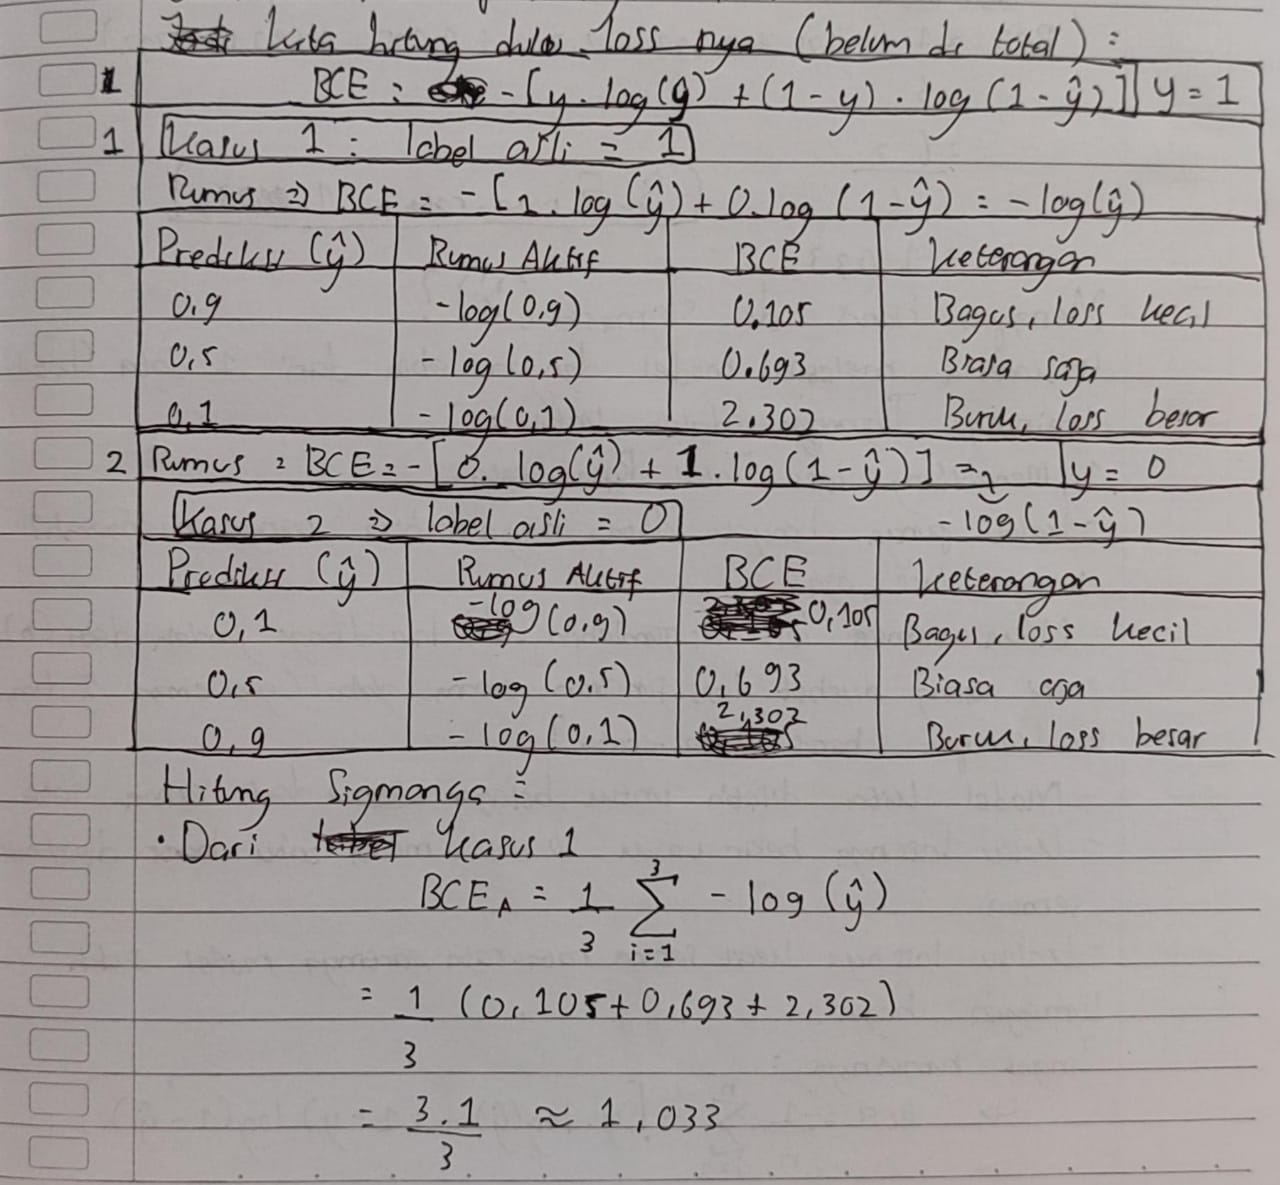

In [ ]:
import numpy as np

# Data prediksi model (output sigmoid)
y_hat_label_1 = np.array([0.9, 0.5, 0.1])  # label asli = 1
y_hat_label_0 = np.array([0.1, 0.5, 0.9])  # label asli = 0

# Label asli
y_true_label_1 = np.array([1, 1, 1])
y_true_label_0 = np.array([0, 0, 0])

# Gabungkan semua data
y_true = np.concatenate([y_true_label_1, y_true_label_0])
y_hat = np.concatenate([y_hat_label_1, y_hat_label_0])

# Fungsi Binary Cross Entropy (BCE)
def binary_cross_entropy(y_true, y_hat):
    epsilon = 1e-15  # untuk menghindari log(0)
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_hat) + (1 - y_true) * np.log(1 - y_hat))
    return loss

# Hitung BCE
bce_total = binary_cross_entropy(y_true, y_hat)
bce_total


np.float64(1.033697596403939)

# Contoh Perhitungan Loss Function: Mean Squared Error (MSE)

---

## Data

Prediksi model (output sigmoid):

$$
\hat{y}_{\text{label}=1} = [0.9, 0.5, 0.1]
$$

$$
\hat{y}_{\text{label}=0} = [0.1, 0.5, 0.9]
$$

Label sebenarnya:

$$
y_{\text{label}=1} = [1, 1, 1]
$$

$$
y_{\text{label}=0} = [0, 0, 0]
$$

Gabungkan:

$$
\hat{y} = [0.9, 0.5, 0.1, 0.1, 0.5, 0.9]
$$

$$
y = [1, 1, 1, 0, 0, 0]
$$

---

## Rumus Mean Squared Error (MSE)

Mean Squared Error didefinisikan sebagai:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

dengan:
- \( n = 6 \) (jumlah data)
- \( y_i \) = label sebenarnya
- \( \hat{y}_i \) = prediksi model

---

## Perhitungan Manual

Hitung selisih antara label asli dan prediksi, kemudian kuadratkan:

$$
\begin{array}{|c|c|c|c|}
\hline
\text{Data} & y_i & \hat{y}_i & (y_i - \hat{y}_i) & (y_i - \hat{y}_i)^2 \\
\hline
1 & 1 & 0.9 & 1 - 0.9 = 0.1 & (0.1)^2 = 0.01 \\
2 & 1 & 0.5 & 1 - 0.5 = 0.5 & (0.5)^2 = 0.25 \\
3 & 1 & 0.1 & 1 - 0.1 = 0.9 & (0.9)^2 = 0.81 \\
4 & 0 & 0.1 & 0 - 0.1 = -0.1 & (-0.1)^2 = 0.01 \\
5 & 0 & 0.5 & 0 - 0.5 = -0.5 & (-0.5)^2 = 0.25 \\
6 & 0 & 0.9 & 0 - 0.9 = -0.9 & (-0.9)^2 = 0.81 \\
\hline
\end{array}
$$

---

### Jumlahkan Semua Kuadrat Error

$$
\text{Total Squared Error} = 0.01 + 0.25 + 0.81 + 0.01 + 0.25 + 0.81 = 2.14
$$

---

### Rata-rata Squared Error

Karena \( n = 6 \):

$$
\text{MSE} = \frac{2.14}{6} = 0.3567
$$

---

## Hasil Akhir

Nilai Mean Squared Error:

$$
\boxed{0.3567}
$$

---

# Kesimpulan

- **MSE** mengukur rata-rata error kuadrat antara prediksi dan nilai sebenarnya.
- Semakin kecil nilai MSE, semakin baik performa model.
- Pada kasus ini, nilai **MSE ≈ 0.3567**.

---


In [ ]:
import numpy as np

# Data prediksi model (output sigmoid)
y_hat_label_1 = np.array([0.9, 0.5, 0.1])  # label asli = 1
y_hat_label_0 = np.array([0.1, 0.5, 0.9])  # label asli = 0

# Label asli
y_true_label_1 = np.array([1, 1, 1])
y_true_label_0 = np.array([0, 0, 0])

# Gabungkan semua data
y_true = np.concatenate([y_true_label_1, y_true_label_0])
y_hat = np.concatenate([y_hat_label_1, y_hat_label_0])

# Fungsi Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_hat) ** 2)
    return mse

# Hitung MSE
mse_result = mean_squared_error(y_true, y_hat)
mse_result

np.float64(0.3566666666666667)